In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from project import api_key
from project import email
from scipy.stats import linregress

In [28]:
# call annual PM25 2012 dataset (with EPA calculated average values)
list_state = ['48', '36', '06']
df_annual = pd.DataFrame()
for state in list_state:
    try:
        url = 'https://aqs.epa.gov/data/api/annualData/byState?'
        params = {'email': email,
                 'key': api_key,
                 'param': '88101',
                 'bdate':'20200101',
                 'edate':'20201201',
                 'state': state}

        response = requests.get(url, params=params).json()
        data=response['Data']
        int_df = pd.DataFrame(data)
        df_annual = df_annual.append(int_df)
    except:
        pass
df_annual

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
1,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
2,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
3,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
4,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,06,001,0013,88101,3,37.864767,-122.302741,NAD83,PM2.5 - Local Conditions,X,...,8.7,4.7,Berkeley Aquatic Park,1 Bolivar Dr,California,Alameda,None,41860,"San Francisco-Oakland-Hayward, CA",2021-10-31
1493,06,001,0013,88101,3,37.864767,-122.302741,NAD83,PM2.5 - Local Conditions,X,...,8.7,4.7,Berkeley Aquatic Park,1 Bolivar Dr,California,Alameda,None,41860,"San Francisco-Oakland-Hayward, CA",2021-10-31
1494,06,001,0013,88101,3,37.864767,-122.302741,NAD83,PM2.5 - Local Conditions,X,...,8.7,4.7,Berkeley Aquatic Park,1 Bolivar Dr,California,Alameda,None,41860,"San Francisco-Oakland-Hayward, CA",2021-10-31
1495,06,001,0013,88101,3,37.864767,-122.302741,NAD83,PM2.5 - Local Conditions,X,...,8.7,4.7,Berkeley Aquatic Park,1 Bolivar Dr,California,Alameda,None,41860,"San Francisco-Oakland-Hayward, CA",2021-10-31


In [5]:
# sent df annual to csv form to read better
# df_annual.to_csv("pm2_5_annual_test.csv")

In [29]:
# remove all rows from the annual dataframe where “pollutant standard” does NOT EQUAL “PM25 Annual 2012"
# this new dataframe will be used for analysis
PM25_annual_2012 = df_annual.loc[df_annual['pollutant_standard'] == 'PM25 Annual 2012']
PM25_annual_2012['pollutant_standard']

2       PM25 Annual 2012
9       PM25 Annual 2012
16      PM25 Annual 2012
23      PM25 Annual 2012
29      PM25 Annual 2012
              ...       
1466    PM25 Annual 2012
1473    PM25 Annual 2012
1480    PM25 Annual 2012
1487    PM25 Annual 2012
1494    PM25 Annual 2012
Name: pollutant_standard, Length: 311, dtype: object

In [4]:
# select only records where “event type” is “events excluded” or “no event”
array=['Events Excluded', 'No Events']
PM25_annual_2012_final = PM25_annual_2012.loc[PM25_annual_2012['event_type'].isin(array)]
PM25_annual_2012_final_df = pd.DataFrame(PM25_annual_2012_final)
PM25_annual_2012_final_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
2,48,375,0320,88101,2,35.201592,-101.909275,WGS84,PM2.5 - Local Conditions,X,...,4.7,2.0,Amarillo A&M,6500 Amarillo Blvd West,Texas,Potter,Amarillo,11100,"Amarillo, TX",2021-10-31
9,48,453,0014,88101,1,30.354944,-97.761803,NAD83,PM2.5 - Local Conditions,X,...,5.8,2.7,Austin North Hills Drive,3824 North Hills Drive,Texas,Travis,Austin,12420,"Austin-Round Rock, TX",2021-10-31
16,48,453,0021,88101,3,30.263204,-97.712891,NAD83,PM2.5 - Local Conditions,X,...,8.4,4.6,Austin Webberville Rd,2600B Webberville Rd,Texas,Travis,Austin,12420,"Austin-Round Rock, TX",2021-10-31
23,48,453,0021,88101,2,30.263204,-97.712891,NAD83,PM2.5 - Local Conditions,7,...,7.4,4.7,Austin Webberville Rd,2600B Webberville Rd,Texas,Travis,Austin,12420,"Austin-Round Rock, TX",2021-10-31
29,48,453,1068,88101,2,30.353860,-97.691660,NAD83,PM2.5 - Local Conditions,X,...,8.3,4.5,Austin North Interstate 35,8912 N IH 35 SVRD SB,Texas,Travis,Austin,12420,"Austin-Round Rock, TX",2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,06,019,2009,88101,3,36.634225,-120.382331,WGS84,PM2.5 - Local Conditions,X,...,5.8,1.1,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,None,23420,"Fresno, CA",2021-10-31
1473,06,047,0003,88101,3,37.281853,-120.433671,NAD83,PM2.5 - Local Conditions,X,...,9.2,4.7,Merced-Coffee,"385 S. COFFEE AVENUE, MERCED, CA 95340",California,Merced,None,32900,"Merced, CA",2021-10-31
1480,06,067,5003,88101,3,38.494475,-121.211131,WGS84,PM2.5 - Local Conditions,X,...,7.0,3.2,Sloughhouse,"7250 SLOUGHHOUSE ROAD, SLOUGHHOUSE",California,Sacramento,None,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-10-31
1487,06,087,1005,88101,3,37.063150,-122.083092,NAD83,PM2.5 - Local Conditions,X,...,4.0,0.5,San Lorenzo Valley Middle School,"7179 Hacienda Way, Felton CA 95018",California,Santa Cruz,None,42100,"Santa Cruz-Watsonville, CA",2021-10-31


In [30]:
PM25_annual_2012_final_df.to_csv("PM25_2012_final.csv")

In [31]:
# read in csv
PM25_annual_2012_final_df_clean = pd.read_csv("PM25_2012_final.csv", index_col ="state")

# retrieving rows by loc method
cal_df = PM25_annual_2012_final_df_clean.loc[["California"]]
cal_df

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,...,seventy_fifth_percentile,fiftieth_percentile,tenth_percentile,local_site_name,site_address,county,city,cbsa_code,cbsa,date_of_last_change
state,,,,,,,,,,,,,,,,,,,,,
California,3,6,59,7,88101,1,33.830620,-117.938450,WGS84,PM2.5 - Local Conditions,...,14.7,10.3,4.8,Anaheim,1630 W. PAMPAS LANE,Orange,Anaheim,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
California,10,6,59,7,88101,3,33.830620,-117.938450,WGS84,PM2.5 - Local Conditions,...,14.4,10.2,3.8,Anaheim,1630 W. PAMPAS LANE,Orange,Anaheim,31080.0,"Los Angeles-Long Beach-Anaheim, CA",2021-10-31
California,16,6,67,6,88101,2,38.613779,-121.368014,WGS84,PM2.5 - Local Conditions,...,18.9,8.5,2.1,Sacramento-Del Paso Manor,"DEL PASO-2701 AVALON DR, SACRAMENTO",Sacramento,Arden-Arcade,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",2021-10-31
California,22,6,67,6,88101,1,38.613779,-121.368014,WGS84,PM2.5 - Local Conditions,...,17.3,8.7,3.9,Sacramento-Del Paso Manor,"DEL PASO-2701 AVALON DR, SACRAMENTO",Sacramento,Arden-Arcade,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",2021-10-31
California,29,6,67,6,88101,3,38.613779,-121.368014,WGS84,PM2.5 - Local Conditions,...,18.3,13.6,9.0,Sacramento-Del Paso Manor,"DEL PASO-2701 AVALON DR, SACRAMENTO",Sacramento,Arden-Arcade,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
California,1466,6,19,2009,88101,3,36.634225,-120.382331,WGS84,PM2.5 - Local Conditions,...,11.2,5.8,1.1,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,Fresno,NaN,23420.0,"Fresno, CA",2021-10-31
California,1473,6,47,3,88101,3,37.281853,-120.433671,NAD83,PM2.5 - Local Conditions,...,16.6,9.2,4.7,Merced-Coffee,"385 S. COFFEE AVENUE, MERCED, CA 95340",Merced,NaN,32900.0,"Merced, CA",2021-10-31
California,1480,6,67,5003,88101,3,38.494475,-121.211131,WGS84,PM2.5 - Local Conditions,...,11.2,7.0,3.2,Sloughhouse,"7250 SLOUGHHOUSE ROAD, SLOUGHHOUSE",Sacramento,NaN,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",2021-10-31


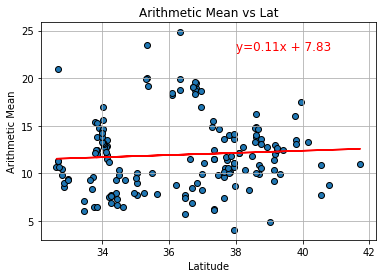

The rvalue is: 0.06500544238295299


<Figure size 432x288 with 0 Axes>

In [51]:
plt.scatter(cal_df["latitude"], cal_df["arithmetic_mean"], edgecolors = "black")
x_axis = cal_df["latitude"]
y_axis = cal_df["arithmetic_mean"]
plt.xlabel("Latitude")
plt.ylabel("Arithmetic Mean")
plt.title("Arithmetic Mean vs Lat")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(38,23),fontsize=12,color="red")
plt.grid()
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Lat_Mean.png")

# Arithmetic Mean represents the calculated mean for all the max values reported per site.

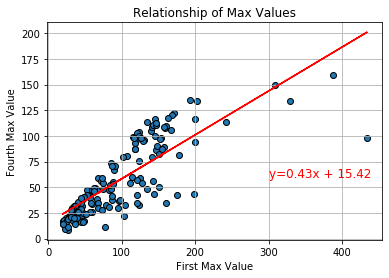

The rvalue is: 0.8046620022395935


<Figure size 432x288 with 0 Axes>

In [52]:
cal_df = cal_df.dropna(subset = ["first_max_value", "fourth_max_value"])

plt.scatter(cal_df["first_max_value"], cal_df["fourth_max_value"], edgecolors = "black")
x_axis = cal_df["first_max_value"]
y_axis = cal_df["fourth_max_value"]
plt.xlabel("First Max Value")
plt.ylabel("Fourth Max Value")
plt.title("Relationship of Max Values")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(300,60),fontsize=12,color="red")
plt.grid()
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Relationship_of_Values.png")

# Represents the correlation between the first and fourth reported max values of each site.

# Conclusion

After creating the dataframe that was specific to just California locations, we are now able to see if there are significant differences in levels of PM2.5 for California between different latitudes. Based on the first visual there is really no correlation between the arithmetic means and latitudes in California. This highlights that the latitude does not affect the level of PM 2.5 in California. The second visual shows the correlation between the first max values recorded and the fourth/final max values recorded for the specific site. Based on the visual there is a strong positive correlation which can tell us that depending on the size of first max value it can be projected that the fourth max value will have a similar size.